In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
# pd.options.display.float_format = "{:,.2f}".format
# import warnings
# warnings.filterwarnings('ignore')
# import matplotlib.ticker as mtick
import moviefunctions as mf

In [2]:
imdb = mf.imdb_clean()
tn = mf.tn_clean()
data = mf.mergetables(tn, imdb)

In [3]:
data.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,budget_gross_ratio,genres,net_profit
0,2009,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",6.53,Horror,"2,351,345,279.00"
1,2011,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2.55,"Action,Adventure,Fantasy","635,063,875.00"
2,2019,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",0.43,"Action,Adventure,Sci-Fi","-200,237,650.00"
3,2015,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",4.24,"Action,Adventure,Sci-Fi","1,072,413,963.00"
4,2018,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,134,200.00",6.83,"Action,Adventure,Sci-Fi","1,748,134,200.00"


In [4]:
# data.sort_values(by='budget_gross_ratio',ascending=False).head(20)
# data.sort_values(by='net_profit',ascending=False).head(20)

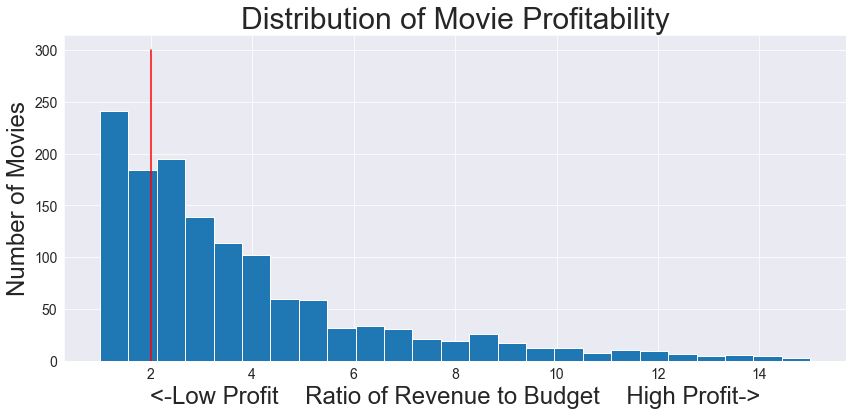

In [5]:
mf.make_bgr_hist_plot(data)

In [6]:
indices = data.genres.value_counts()[:16].index
indices

Index(['Drama', 'Documentary', 'Comedy', 'Comedy,Drama',
       'Adventure,Animation,Comedy', 'Comedy,Drama,Romance',
       'Action,Adventure,Sci-Fi', 'Drama,Romance', 'Action,Crime,Drama',
       'Comedy,Romance', 'Action,Adventure,Fantasy', 'Horror',
       'Drama,Thriller', 'Action,Comedy,Crime', 'Horror,Mystery,Thriller',
       'Horror,Thriller'],
      dtype='object')

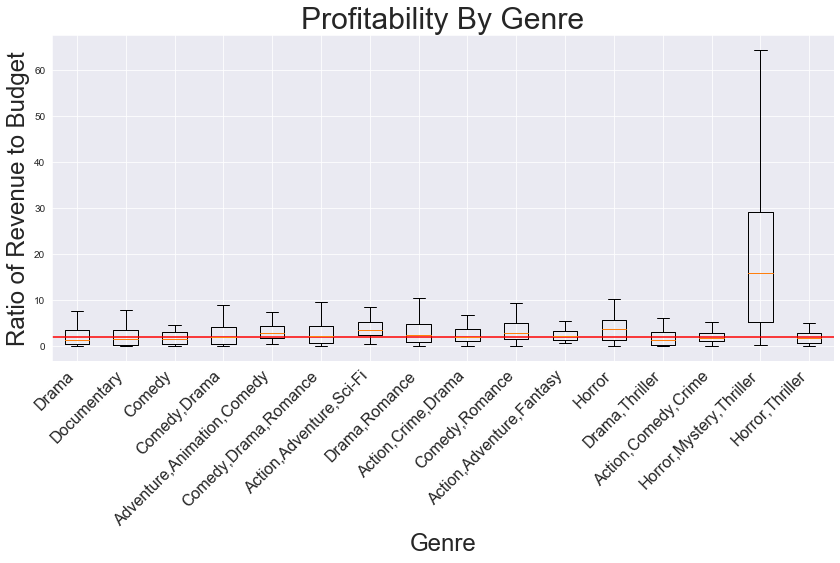

In [7]:
mf.make_bgr_boxplot(data, indices)

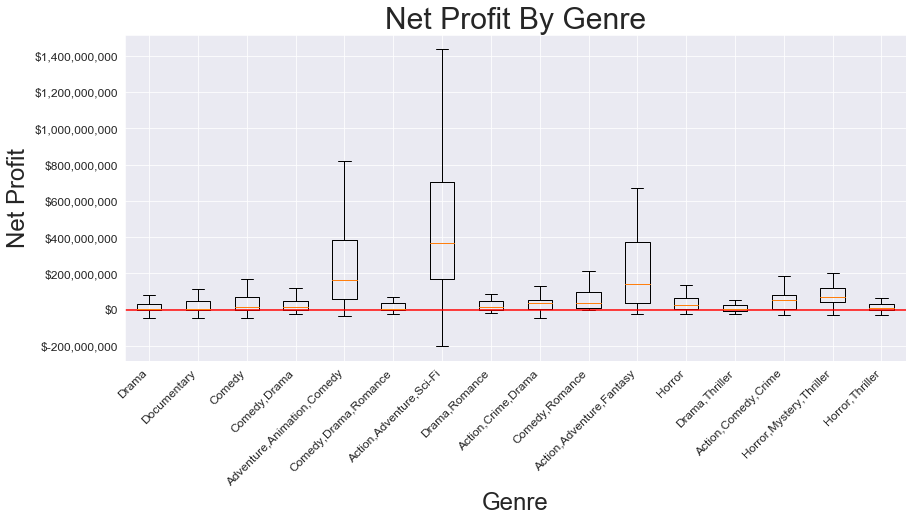

In [8]:
mf.make_gross_boxplot(data, indices)

# By year ------------------

In [ ]:
alltime = data
d2010 = alltime.loc[alltime.release_date >= 2010]
d2000 = alltime.loc[(alltime.release_date < 2010)&(alltime.release_date >= 2000)]
d1990 = alltime.loc[(alltime.release_date < 2000)&(alltime.release_date >= 1990)]

In [ ]:
alltimegrossmedian = alltime.groupby('genres').net_profit.median()
d2010grossmedian = d2010.groupby('genres').net_profit.median()
d2000grossmedian = d2000.groupby('genres').net_profit.median()
d1990grossmedian = d1990.groupby('genres').net_profit.median()

alltimedata = alltimegrossmedian[indices]
d2010data = d2010grossmedian[indices]
d2000data = d2000grossmedian[indices]
d1990data = d1990grossmedian[indices]

fig, ax = plt.subplots(figsize = (14,6))
ax.set_title('Net Profit of Movie Genres', fontsize=30)
ax.set_ylabel('Net Profit', fontsize = 24)
ax.set_xlabel('Genre', fontsize = 24)
ax.set_xticklabels(indices, rotation=45, horizontalalignment='right', fontsize=16)

### Dollar ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.tick_params(labelsize='large')
###

ax.bar(indices, d2010data, color = 'r', alpha = .3, label='2010 to present');
ax.bar(indices, d2000data, color = 'm', alpha = .3, label='2000 to 2010');
ax.bar(indices, d1990data, color = 'b', alpha = .3, label='1990 to 2000');
ax.legend();

In [ ]:
N = len(indices)

ind = np.arange(N)  # the x locations for the groups
width = 0.20       # the width of the bars

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, alltimedata, width, color='darkred')
rects2 = ax.bar(ind+width, d2010data, width, color='red')
rects3 = ax.bar(ind+width*2, d2000data, width, color='salmon')
rects4 = ax.bar(ind+width*3, d1990data, width, color='peachpuff')

# add some
ax.set_ylabel('Median Gross')
ax.set_title('Median Gross')
ax.set_xticks(ind + width)
ax.set_xticklabels(indices)


ax.set_xticklabels(indices, rotation=45, horizontalalignment='right', fontsize=16)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('All time', '2010-present', '2000-2010', '1990-2000') )

plt.show()